In [20]:
# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(17)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Linear Regression

In [21]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

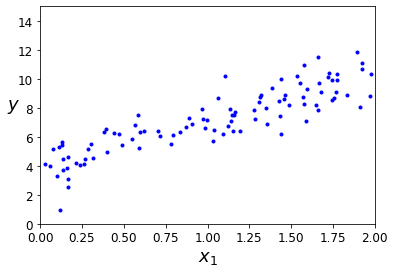

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])


In [23]:
# Add a column with x[0] = 1 for a rows
X_b = np.c_[np.ones((100, 1)), X]
# These's close-form solution of the given problem
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.89053611]
 [3.21724034]]


In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.89053611]
 [10.3250168 ]]


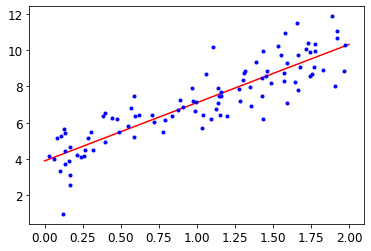

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.89053611]
[[3.21724034]]


# Batch Gradient Descent

In [31]:
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)


[[3.89053611]
 [3.21724034]]


# Stochastic Gradient Descent

In [37]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(17)

n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    # Continue to make the eta smaller
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print(theta)


[[3.90240275]
 [3.16455188]]


In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=17)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[3.91459713]
[3.2848763]


# Mini-Batch Gradient Descent

In [39]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(17)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
	shuffled_indices = np.random.permutation(m)
	X_b_shuffled = X_b[shuffled_indices]
	y_shuffled = y[shuffled_indices]
	for i in range(0, m, minibatch_size):
		t += 1
		xi = X_b_shuffled[i:i+minibatch_size]
		yi = y_shuffled[i:i+minibatch_size]
		gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(t)
		theta = theta - eta * gradients
		theta_path_mgd.append(theta)

print(theta)

[[3.8168444 ]
 [3.11572786]]
